17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/5
157/157 [==============================] - 40s 207ms/step - loss: 0.4993 - accuracy: 0.7611 - val_loss: 0.3303 - val_accuracy: 0.8646
Epoch 2/5
157/157 [==============================] - 25s 156ms/step - loss: 0.2617 - accuracy: 0.9000 - val_loss: 0.3080 - val_accuracy: 0.8740
Epoch 3/5
157/157 [==============================] - 20s 125ms/step - loss: 0.1811 - accuracy: 0.9353 - val_loss: 0.2885 - val_accuracy: 0.8864
Epoch 4/5
157/157 [==============================] - 14s 86ms/step - loss: 0.1479 - accuracy: 0.9478 - val_loss: 0.3232 - val_accuracy: 0.8648
Epoch 5/5
157/157 [==============================] - 12s 79ms/step - loss: 0.1111 - accuracy: 0.9638 - val_loss: 0.3394 - val_accuracy: 0.8744
Epoch 1/5
157/157 [==============================] - 29s 168ms/step - loss: 0.5419 - accuracy: 0.7039 - val_loss: 0.3463 - val_accuracy: 0.8510
Epoch 2/5
157/157 [==============================] - 20s 124ms/step - los

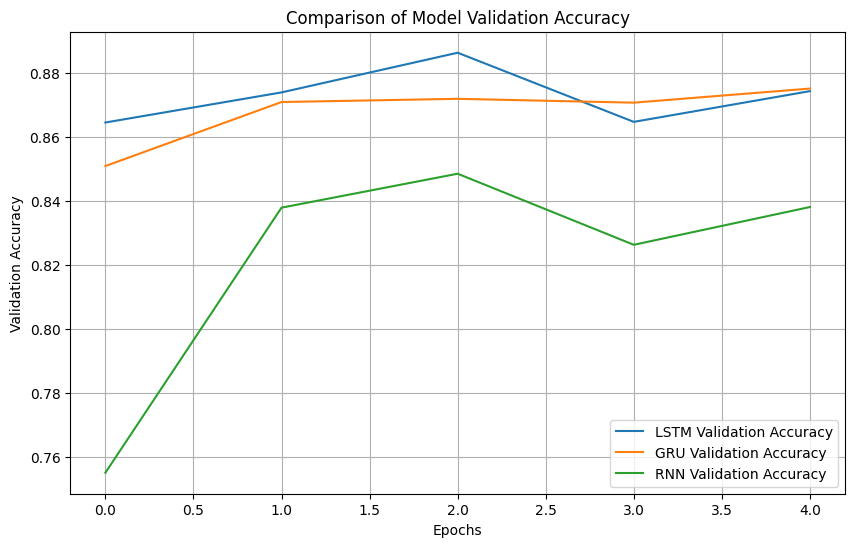

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical

# Load the IMDb dataset
max_features = 10000
max_len = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Create models
def create_model(model_type):
    model = Sequential()
    model.add(Embedding(max_features, 32, input_length=max_len))
    if model_type == 'LSTM':
        model.add(LSTM(32))
    elif model_type == 'GRU':
        model.add(GRU(32))
    elif model_type == 'RNN':
        model.add(SimpleRNN(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train models and collect history
model_types = ['LSTM', 'GRU', 'RNN']
histories = []

plt.figure(figsize=(10, 6))

for model_type in model_types:
    model = create_model(model_type)
    history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)
    plt.plot(history.history['val_accuracy'], label=f'{model_type} Validation Accuracy')

plt.title('Comparison of Model Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()